In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("drug200.csv")

In [23]:
X = df.drop('Drug', axis=1)
y = df['Drug']

le = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(y)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

df_train = pd.DataFrame(X_train,index=X_train[:,0])
df_train

,0,1,2,3,4
-1.574285,-1.574285,-1.089725,-1.070490,-0.891556,-0.664633
0.620033,0.620033,-1.089725,-1.070490,-0.891556,1.239451
1.717193,1.717193,0.917663,-1.070490,-0.891556,-1.239451
-0.154432,-0.154432,0.917663,0.128459,-0.891556,0.233520
-0.025355,-0.025355,0.917663,1.327407,1.121635,-1.706490
...,...,...,...,...,...
-1.445208,-1.445208,0.917663,1.327407,-0.891556,-0.449076
0.232801,0.232801,-1.089725,1.327407,-0.891556,-0.341298
-1.057975,-1.057975,-1.089725,-1.070490,-0.891556,1.526860
1.329960,1.329960,-1.089725,1.327407,-0.891556,0.341298


In [26]:
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

In [27]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73        26
           1       0.64      1.00      0.78         7
           2       0.50      1.00      0.67         3
           3       0.60      1.00      0.75         6
           4       1.00      1.00      1.00        18

    accuracy                           0.82        60
   macro avg       0.75      0.92      0.79        60
weighted avg       0.89      0.82      0.82        60



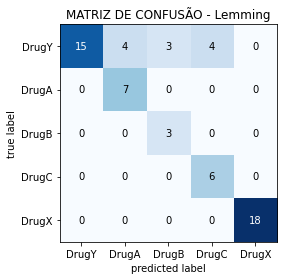

In [28]:
c_matriz = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=c_matriz)
plt.title('MATRIZ DE CONFUSÃO - Lemming')

ticks = ['DrugY', 'DrugA', 'DrugB', 'DrugC', 'DrugX']
n_ticks = [0, 1, 2, 3, 4]
ax.set_xticks(n_ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(n_ticks)
ax.set_yticklabels(ticks)

plt.savefig('MatrizConfusão.png', format='png')
plt.show()